#State of the Library: matplotlib

### PyData Seattle 2015

Thomas Caswell  @tacaswell

Brookhaven National Labratory

Co-lead developer of matplotlib

This requires the commits on https://github.com/matplotlib/matplotlib/pull/4787

In [13]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import itertools
import matplotlib

## matplotlib is alive and well

Signed FSA with NumFocus

### Have a very broad contributor base

Extract author + commit date from git from 2013-01-01 till now

    echo 'time&name' > commits_time_author.csv; 
    git log --no-merges --since=2013-01-01 --pretty=format:'%at&%aN <%aE>' >> commits_time_author.csv

In [14]:
commits = pd.read_csv('commits_time_author.csv', sep='&')

<IPython.core.display.Javascript object>


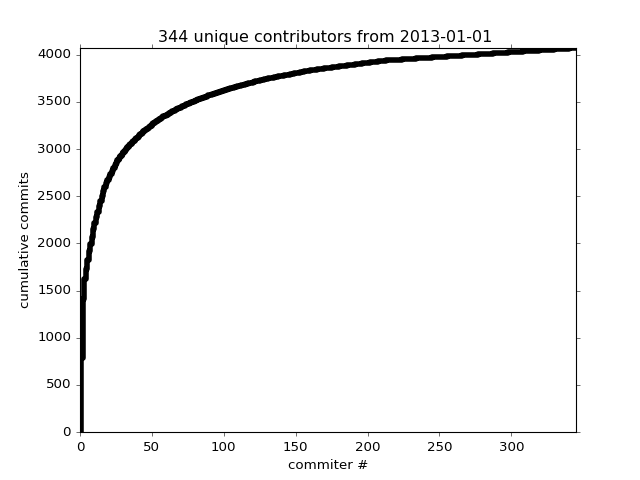

In [15]:
commiters = Counter(commits['name'])
commiter_number = list(range(len(commiters) + 1))
c_count = list(commiters.values())
cum_commits = np.r_[[0], np.cumsum(sorted(c_count, reverse=True))]

fig, ax = plt.subplots()
ax.step(commiter_number, cum_commits, where='post', color='k', lw=5)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
ax.set_xlim([0, max(commiter_number)])
ax.set_ylim([0, np.sum(c_count)])
ax.set_ylabel('cumulative commits')
ax.set_xlabel('commiter #')
ax.set_title("{} unique contributors from 2013-01-01 ".format(max(commiter_number)-1))


<IPython.core.display.Javascript object>


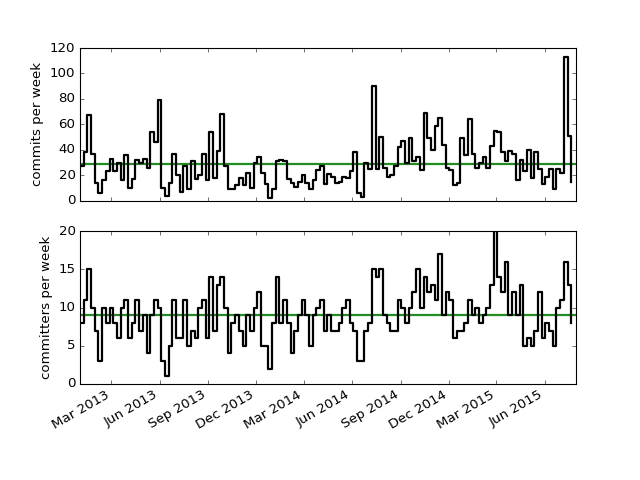

In [16]:
def stats_plotter(ax, left_edges, unq_by_week, col, ylabel):
    ln, = ax.step(left_edges,
                  unq_by_week[col], color='k', where='post', lw=2)

    hln = ax.axhline(unq_by_week[col].mean(), color='forestgreen', zorder=0, lw=2)
    ax.set_ylabel(ylabel)
    return ln, hln


def by_window_binner(ax1, ax2, commits, start, stop, step, window_name):
    edges = np.arange(start, stop + step, step)
    left_edges = [dt.datetime.fromtimestamp(t) for t in edges[:-1]]

    gb = commits.groupby(pd.cut(commits['time'], edges))
    unq_by_bin = gb.agg(lambda x: len(set(x)))


    
    stats_plotter(ax1, left_edges, unq_by_bin, 'time', 'commits per {}'.format(window_name))
    stats_plotter(ax2, left_edges, unq_by_bin, 'name', 'committers per {}'.format(window_name))

start = dt.datetime(2013, 1, 1).timestamp()
stop  = dt.datetime.now().timestamp()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
by_window_binner(ax1, ax2, commits, start, stop, 7*24*60*60, 'week')
ax1.set_xlim((dt.datetime(2013, 1, 1), dt.datetime(2015, 7, 30)))
fig.autofmt_xdate()

### Other stats

- matplotlib.org
  - 470k sessions/month
  - 1.4m page views/month
  - google thinks 190k users/month
  - cute patterns in time
- github
  - 40k views/month
  - 14k users/month
  - 3k total / 1.3k unique cloners/month
  - 1.3k forks
- source forge
  - 60-120k monthly downloads (39-55% windows)
  - 2M total downloads in last 2 years
  - spikes of 100k/month around releases
- pypi
  - 190k/month
- Other
  - no data from Cristoph Gohlke, enthought, continuum, any linux packaging

Have a large mature codebase


    11:41 $ cloc lib
        1100 text files.
        1090 unique files.                                          
         834 files ignored.
    
    http://cloc.sourceforge.net v 1.64  T=3.04 s (88.0 files/s, 51432.2 lines/s)
    -----------------------------------------------------------------------------------
    Language                         files          blank        comment           code
    -----------------------------------------------------------------------------------
    Python                             244          27569          34364          87354
    C++                                  6            684            460           3770
    C/C++ Header                         4            233            371            604
    Javascript                           6            137            106            563
    CSS                                  4             52             33            172
    HTML                                 3             16              3             88
    Windows Resource File                1              1              0              2
    -----------------------------------------------------------------------------------
    SUM:                               268          28692          35337          92553
    -----------------------------------------------------------------------------------
 

    
    Author: John Hunter <jdh2358@gmail.com>  2003-05-12 11:20:38
    Committer: John Hunter <jdh2358@gmail.com>  2003-05-12 11:20:38
    Child:  967cb7017afc868557e1c504bc398f54cac08b42 (adding examples)
    Branches: master and many more (445)
    Follows: 
    Precedes: v0.91.2
    
        The new matplotlib hierarchy
        
        svn path=/trunk/matplotlib/; revision=7
    

## Near-term Release Schedule

 - In Feature freeze for 1.5, targetting first RC by end of month
 - Style change only 2.0 in September
 - 2.1 release March/April 2016

### Style change procedure

 - Had BOF at SciPy on style changes
 - Put in PRs/issues against master with changes you want to see
 - Have until August 9 to propose changes and then Mike Droettboom and I will make decisions
 - Please spread the word!

## DEMOS
### In 1.4.3

#### Notebook AGG (`%matplotlib nbagg` or `%matplotlib notebook`)

 - interactive front end for mpl in the notebook
 - needs a live python kernel on the server side
   - only a png in nbviewer
 - Mike Droettboom, Jason Grout, Phil Elson, Steven Silvester 
 - full mouse/key events back into python layer

<IPython.core.display.Javascript object>


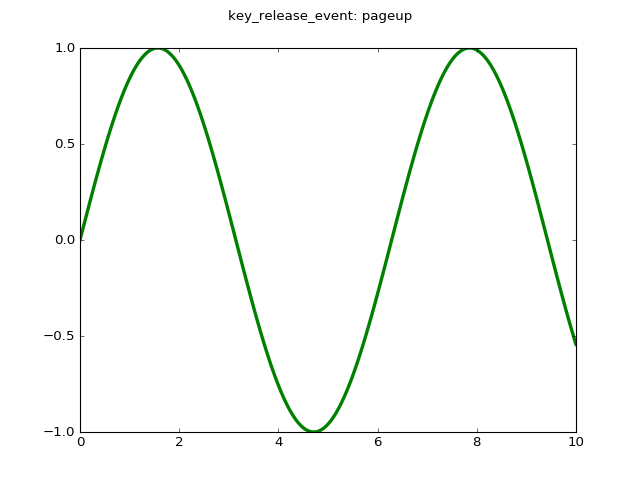

10

In [17]:
fig, ax = plt.subplots()
x = np.linspace(0,10,10000)
y = np.sin(x)
ln, = ax.plot(x,y, lw=3)
evt = []
colors = iter(itertools.cycle(['r', 'g', 'b', 'k', 'purple']))
def on_event(event):
    if event.name.startswith('key'):
        fig.suptitle('%s: %s' % (event.name, event.key))
    elif event.name == 'scroll_event':
        fig.suptitle('%s: %s' % (event.name, event.step))
    else:
        fig.suptitle('%s: %s' % (event.name, event.button))
    evt.append(event)
    ln.set_color(next(colors))

fig.canvas.mpl_connect('button_press_event', on_event)
fig.canvas.mpl_connect('button_release_event', on_event)
fig.canvas.mpl_connect('scroll_event', on_event)
fig.canvas.mpl_connect('key_press_event', on_event)
fig.canvas.mpl_connect('key_release_event', on_event)

<IPython.core.display.Javascript object>


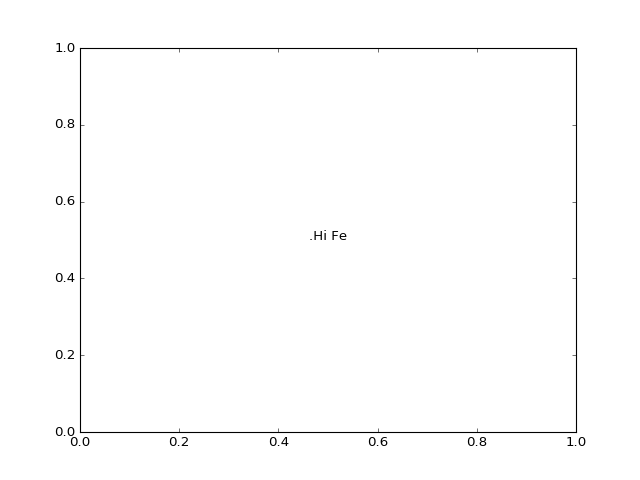

6

In [18]:
fig, ax = plt.subplots()
txt = ax.annotate('.', (.5, .5), xycoords='axes fraction', ha='center')

def echoer(event):
    if len(event.key) == 1:
        txt.set_text(txt.get_text() + event.key)
    elif event.key == 'backspace':
        txt.set_text(txt.get_text()[:-1])
    
fig.canvas.mpl_connect('key_press_event', echoer)

<IPython.core.display.Javascript object>


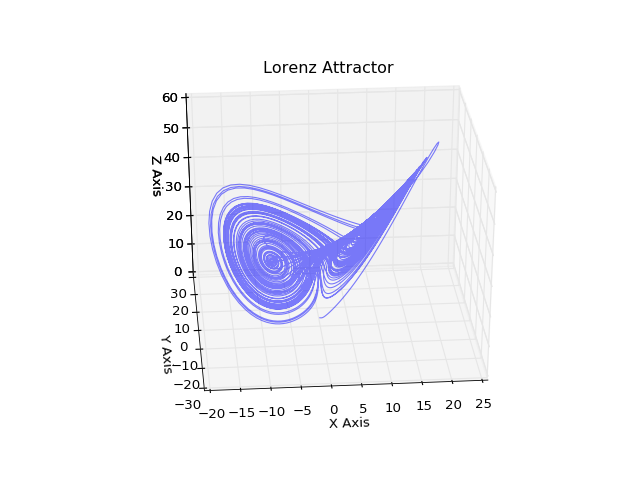

In [19]:
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, alpha=.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

Rich user interaction

<IPython.core.display.Javascript object>


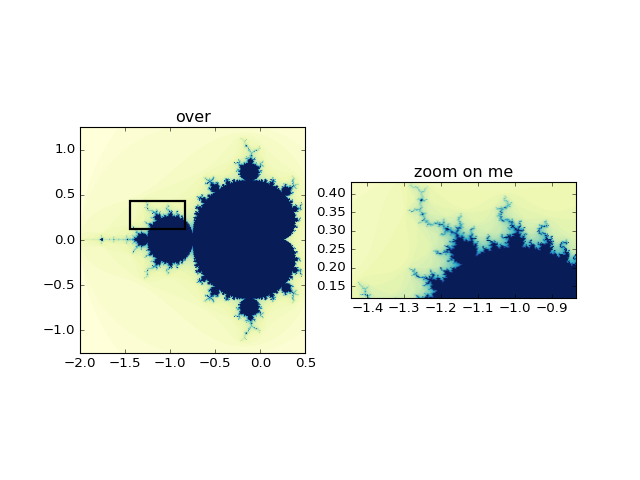

In [20]:
# Creates two identical panels.  Zooming in on the right panel will show
# a rectangle in the first panel, denoting the zoomed region.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# We just subclass Rectangle so that it can be called with an Axes
# instance, causing the rectangle to update its shape to match the
# bounds of the Axes
class UpdatingRect(Rectangle):
    def __call__(self, ax):
        self.set_bounds(*ax.viewLim.bounds)
        ax.figure.canvas.draw_idle()

# A class that will regenerate a fractal set as we zoom in, so that you
# can actually see the increasing detail.  A box in the left panel will show
# the area to which we are zoomed.
class MandlebrotDisplay(object):
    def __init__(self, h=500, w=500, niter=50, radius=2., power=2):
        self.height = h
        self.width = w
        self.niter = niter
        self.radius = radius
        self.power = power

    def __call__(self, xstart, xend, ystart, yend):
        self.x = np.linspace(xstart, xend, self.width)
        self.y = np.linspace(ystart, yend, self.height).reshape(-1,1)
        c = self.x + 1.0j * self.y
        threshold_time = np.zeros((self.height, self.width))
        z = np.zeros(threshold_time.shape, dtype=np.complex)
        mask = np.ones(threshold_time.shape, dtype=np.bool)
        for i in range(self.niter):
            z[mask] = z[mask]**self.power + c[mask]
            mask = (np.abs(z) < self.radius)
            threshold_time += mask
        return threshold_time

    def ax_update(self, ax):
        ax.set_autoscale_on(False) # Otherwise, infinite loop

        #Get the number of points from the number of pixels in the window
        dims = ax.axesPatch.get_window_extent().bounds
        self.width = int(dims[2] + 0.5)
        self.height = int(dims[2] + 0.5)

        #Get the range for the new area
        xstart,ystart,xdelta,ydelta = ax.viewLim.bounds
        xend = xstart + xdelta
        yend = ystart + ydelta

        # Update the image object with our new data and extent
        im = ax.images[-1]
        im.set_data(self.__call__(xstart, xend, ystart, yend))
        im.set_extent((xstart, xend, ystart, yend))
        ax.figure.canvas.draw_idle()

md = MandlebrotDisplay()
Z = md(-2., 0.5, -1.25, 1.25)

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()), cmap='YlGnBu')
ax2.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()), cmap='YlGnBu')

rect = UpdatingRect([0, 0], 0, 0, facecolor='None', edgecolor='black', lw=2)
rect.set_bounds(*ax2.viewLim.bounds)
ax1.add_patch(rect)

# Connect for changing the view limits
ax2.callbacks.connect('xlim_changed', rect)
ax2.callbacks.connect('ylim_changed', rect)

ax2.callbacks.connect('xlim_changed', md.ax_update)
ax2.callbacks.connect('ylim_changed', md.ax_update)

ax2.set_title('zoom on me')
ax1.set_title('over')

### matplotlib.style
 - partially update rcparams (default values)
 - Tony Yu 

In [21]:
import matplotlib.style as ms
ms.available

['seaborn-colorblind',
 'seaborn-dark',
 'seaborn-ticks',
 'seaborn-pastel',
 'ggplot',
 'seaborn-talk',
 'fivethirtyeight',
 'bmh',
 'seaborn-whitegrid',
 'seaborn-muted',
 'seaborn-deep',
 'dark_background',
 'seaborn-notebook',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-poster',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-dark-palette']

<IPython.core.display.Javascript object>


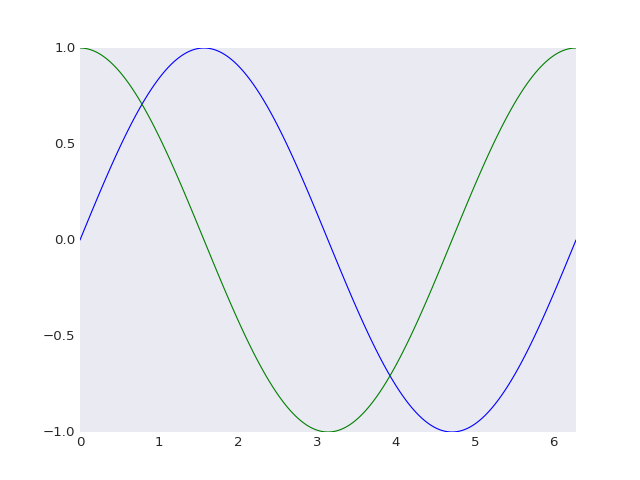

In [23]:
leheny = 'http://tiny.cc/leheny-style/raw'
th = np.linspace(0, 2*np.pi, 1024)

with ms.context('seaborn-dark'):
    fig, ax = plt.subplots()
    ln_sin, = ax.plot(th, np.sin(th))
    ln_cos, = ax.plot(th, np.cos(th))
    ax.set_xlim(0, 2*np.pi)

### Features in next feature release

#### OO auto-redraw

![img](fig_map.png)

<IPython.core.display.Javascript object>


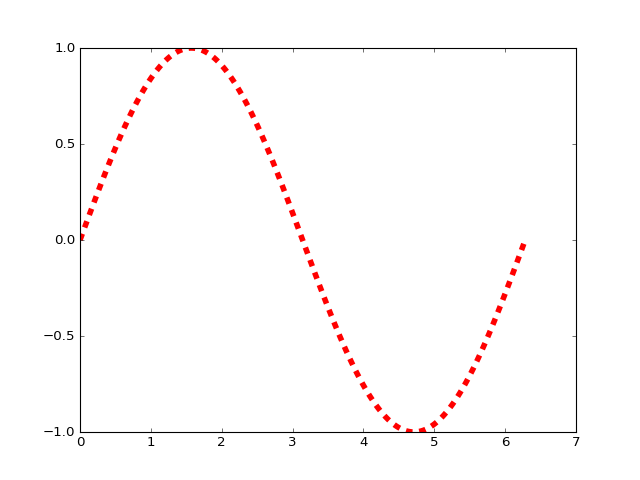

In [24]:
fig, ax = plt.subplots()
ln, = ax.plot(th, np.sin(th), ls='--')

In [26]:
ln.set_color('red')

#### String labels to bar plots

<IPython.core.display.Javascript object>


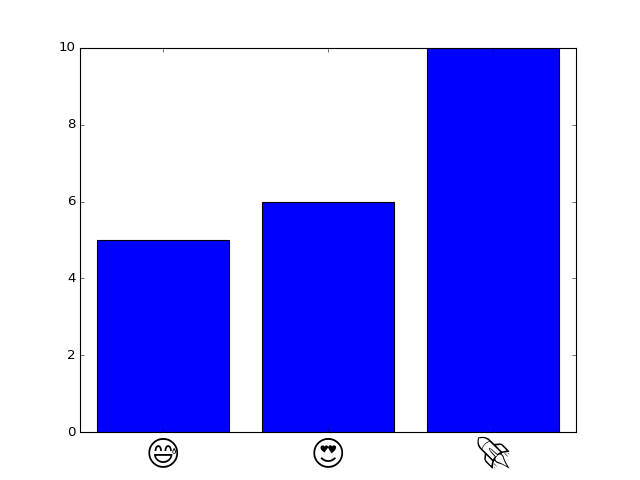

[(None, None), (None, None), (None, None)]

In [27]:
fig, ax = plt.subplots()
ax.bar(range(3), [5, 6, 10], tick_label=list('😅😍🚀'), align='center')
[(t.set_fontname('symbola'), t.set_fontsize(32)) for t in ax.xaxis.get_ticklabels()]


#### Cycler

In [28]:
import cycler as cr

In [29]:
cr.cycler('color', 'rgb')+ cr.cycler('lw', range(1, 4))

'r',1
'g',2
'b',3


In [30]:
(cr.cycler('color','rgb') + cr.cycler('lw', range(3))) * cr.cycler('ls', ['-', '--'])

'r','-',0
'r','--',0
'g','-',1
'g','--',1
'b','-',2
'b','--',2


#### Label Data aware (?)

<IPython.core.display.Javascript object>


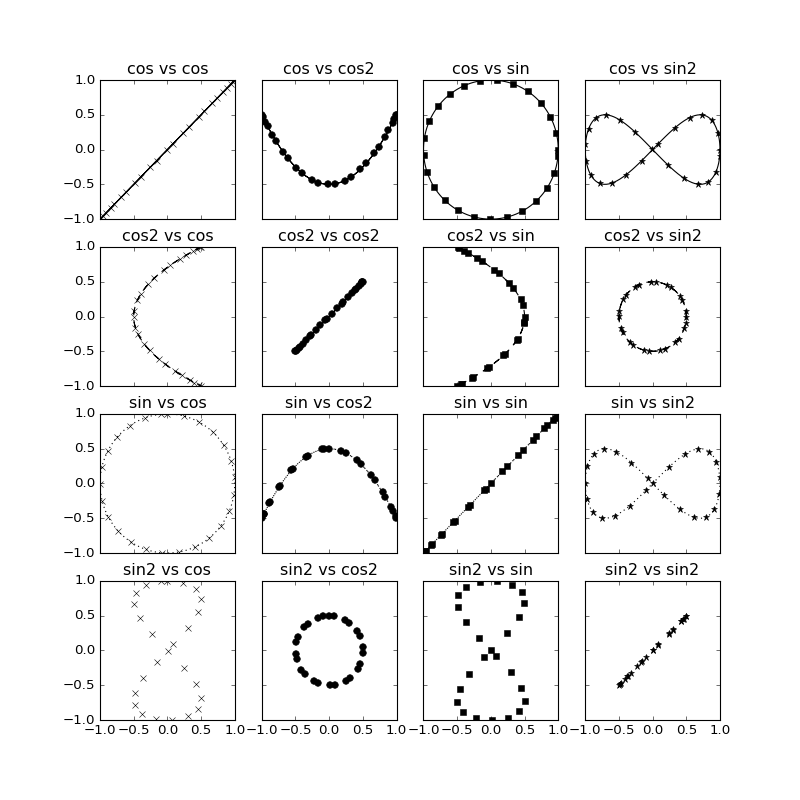

In [31]:
import cycler as cy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def simple_plot(ax, x, y, **kwargs):
    return ax.plot(x, y, **kwargs)

th = np.linspace(0, 2*np.pi, 128)
df = pd.DataFrame({'sin': np.sin(th), 'cos': np.cos(th),
                   'sin2': .5 * np.sin(2 * th), 'cos2': .5 * np.cos(2 * th)})

def easy_facet(df, cycle1, cycle2):
    cycleX = (cy.cycler('x', df.keys()) + cycle1)
    cycleY = (cy.cycler('y', df.keys()) + cycle2) 
    kw_cycle = cycleX * cycleY

    fig, axes = plt.subplots(len(df.keys()), len(df.keys()), sharex=True, sharey=True,
                             figsize=(10, 10))
    lines = []
    axes[0, 0].set_xlim([-1, 1])
    axes[0, 0].set_ylim([-1, 1])
    for ax, kwargs in zip(axes.ravel(), kw_cycle):
        
        ln, = simple_plot(ax, markevery=5, data=df, **kwargs)
        ax.set_title('{x} vs {y}'.format(**kwargs))
        lines.append(ln)
        
    return lines


arts = easy_facet(df, cy.cycler('linestyle', ['-', '--', ':', '']), cy.cycler('marker', 'xos*'))

In [32]:
for ln in arts:
    ln.set_color('k')

Draft of next release notes

 - *at the repl the OO interface lazily auto-redraws*
 - *better spelling for plotting labeled data*
 - convenience decorators
 - artists can add z-data to gui on hover (pixel value in imshow) [pending performance fixes]
 - auto-wrapping of long text
 - cycler
 - new tool-bar machinery (GTK only)
 - legend support for more collections
 - per-artist usetex control
 - unified line style across Line, Patch, and Collection
 - add page notes in multi-page pdfs
 - text labels for ticks as input to `bar`
 - support both wxpython classic and wxpython phoenix (python 3 support)
 - Added 'logit' axis scale
 - Major improvements to table
 - bucket of rcparams


### Target work for next-feature release  (2.1)

 - nbagg + widget integration (jupyter notebook, Steven Silvester)
 - better containers classes 
 - serialization & traitlets (Brian Granger / Ryan Morshead)

## Soap box

 - Write functions which take explicit axes, data, style is input and return artists
 - Composable foundation for building higher level functions
 - Eases writing interactive graphs

In [33]:
def my_plotter(ax, data, style):
    # call other functions that generate artists
    return arts

In [34]:
def pandas_plot(ax, df, style_cycle, **kwargs):
    """
    Plot a pandas DataFrame

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to plot to

    df : pd.DataFrame
        The data to plot

    style_cycle : Cycler
        Something that when iterated over yields style dict

    Returns
    -------
    ret : dict
        Dictionary of line2d artists added 
    """
    ret = {}
    x = df.index
    for n, sty in zip(df.columns, style_cycle):
        sty.update(kwargs)
        ln, = ax.plot(x, df[n], label=n, **sty)
        ret[n] = ln
    ax.legend()
    return ret


In [35]:
from IPython.html.widgets import *
from IPython.display import display

def widget_function_factory(arts):
    """
    Generate fulnction + args to pass to interactive
    Parameters
    ----------
    arts : dict
        dictionary of Line2D
        
    """
    
    name = Dropdown(options=list(arts.keys()))
        
    def set_all(_, old_line, new_line):
        ln = arts[new_line]
        lw.value = ln.get_lw()
        alph.value = ln.get_alpha() or 1
        visible.value = ln.get_visible()
        markevery.value = ln.get_markevery()
        marker.value = ln.get_marker()
        
    def set_lw(_, old_lw, new_lw):
        ln = arts[name.value]
        arts[name.value].set_lw(new_lw)
        arts[name.value].axes.legend()
        
    def set_alpha(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_alpha(new_value)
        ln.axes.legend()
        
    def set_visible(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_visible(new_value)
        ln.axes.legend()
        
    def set_markevery(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_markevery(new_value)
        
    def set_marker(_, old_value, new_value):
        ln = arts[name.value]
        ln.set_marker(new_value)
        ln.axes.legend()
        
    lw = FloatSlider(min=1, max=5, description='lw: ')
    alph = FloatSlider(min=0, max=1, description='alpha: ')
    visible = Checkbox(description='visible: ')
    markevery = IntSlider(min=1, max=15, description='markevery: ')
    marker = Dropdown(options={v:k for k, v in matplotlib.markers.MarkerStyle.markers.items()},
                     description='marker: ')
    
    name.on_trait_change(set_all, 'value')
    lw.on_trait_change(set_lw, 'value')
    alph.on_trait_change(set_alpha, 'value')
    visible.on_trait_change(set_visible, 'value')
    markevery.on_trait_change(set_markevery, 'value')
    marker.on_trait_change(set_marker, 'value')
    display(name, lw, alph, marker, markevery, visible)
    set_all(None, None, name.value)
        

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [36]:
import pandas as pd
import numpy as np

th = np.linspace(0, 2*np.pi, 128)
df = pd.DataFrame({'sin': np.sin(th),
                   'shift +': np.sin(th + np.pi / 3), 
                   'shift -': np.sin(th - np.pi / 3)}, index=th)

<IPython.core.display.Javascript object>


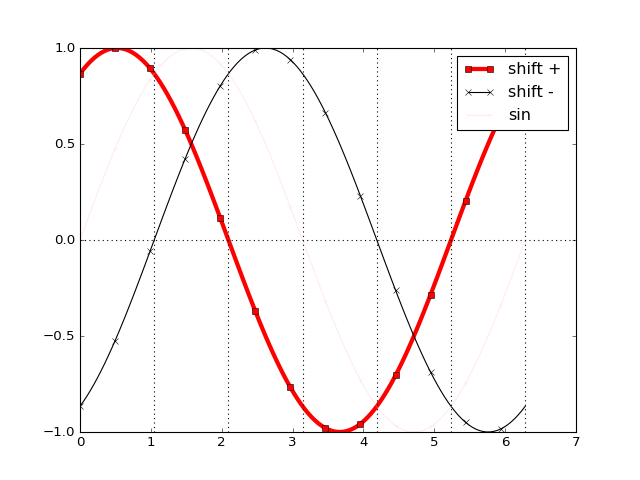

In [37]:
plt.close('all')
style_cycle = cr.cycler('color',['r', 'black', 'pink']) + cr.cycler('marker', 'sxo')
arts = pandas_plot(plt.gca(), df, style_cycle, markevery=10)
vlns = []
for x in np.arange(1, 7) * np.pi/3:
    vlns.append(plt.axvline(x, color='k', linestyle=':'))
plt.axhline(0, color='k', linestyle=':')
None

In [38]:
widget_function_factory(arts)

In [39]:
vlns
[v.set_visible(True) for v in vlns]

[None, None, None, None, None, None]

### Place in community

 - we really are friendly, just slow!
 - always looking for new contributors 
 - usage now well outside domain knowledge of core-devs
  - looking for domain experts to develop specialized plotting tools
  - adopt scikits model of cooperative independent libraries
  - happy to host projects built on top of mpl under matplotlib.org organization
 - we want to be a substrate for domain-specific plotting

## Thank you

  - John Hunter

In [40]:
sorted([n.split('<')[0].rstrip() for n in commiters.keys()])

['Acanthostega',
 'Adam Ginsburg',
 'Adam Heck',
 'Adrian Price-Whelan',
 'Alan Du',
 'Alejandro Dubrovsky',
 'Alex Loew',
 'Alexander Taylor',
 'Alexei Colin',
 'Ali Mehdi',
 'Alistair Muldal',
 'Allan Haldane',
 'Andrea Bedini',
 'Andreas Wallner',
 'Andrew Dawson',
 'Andrew Merrill',
 'Andy Zhu',
 'Anton Akhmerov',
 'Antony Lee',
 'Arie',
 'Ariel Hernán Curiale',
 'Arnaud Gardelein',
 'Arpad Horvath',
 'Aseem Bansal',
 'Behram Mistree',
 'Ben Cohen',
 'Ben Gamari',
 'Ben Keller',
 'Ben Root',
 'Benjamin Reedlunn',
 'Binglin Chang',
 'Bradley M. Froehle',
 'Brandon Liu',
 'Brian Mattern',
 'Brian McLaughlin',
 'CJ Carey',
 'Cameron Bates',
 'Cameron Davidson-Pilon',
 'Carissa Brittain',
 'Carwyn Pelley',
 'Casper van der Wel',
 'Chris Beaumont',
 'Chris G',
 'Christian Brueffer',
 'Christoph Gohlke',
 'Christoph Hoffmann',
 'Cimarron Mittelsteadt',
 'Damon McDougall',
 'Danhickstein',
 'Daniel Hyams',
 "Daniel O'Connor",
 'Dara Adib',
 'David',
 'David Anderson',
 'David Haberthür',
